In [2689]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

warnings.filterwarnings('ignore') #Filter Warning Messages
pd.set_option('display.max_columns',120) ## Set display limit for the columns 
pd.set_option('display.max_info_columns',120)# set display limit for Info columns


## Sourcing Loan.csv Data

In [2690]:
# Step1: Importing the Loan.csv Dataset
raw=pd.read_csv('Data/loan.csv', low_memory=False)

In [2691]:
# Step2: Checking the Shape of Loan.csv
raw.shape

(39717, 111)

In [2692]:
# Step3: Checking Sample data of loan.csv
raw.head(2) 

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [2693]:
# Step4: Checking the count of toal numerical and categorical columns in loan.csv

print('Total number of numeric Columns: {}'.format( len([col for col in raw if raw[col].dtype!='object'])))
print('Total number of categorical Columns: {}'.format( len([col for col in raw if raw[col].dtype=='object'])))


Total number of numeric Columns: 87
Total number of categorical Columns: 24


In [2694]:
# Step 5: Checking Non-null information about  Loan.csv

In [2695]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

## Data Cleansing 

#### Removing Duplicate Rows

In [2696]:
raw_0=raw.drop_duplicates()

In [2697]:
if raw.shape[0] == raw_0.shape[0]:
    print('No row level Duplicate Records Observed')
else :
    print('{} Duplicate Records were removed'.format(int(raw.shape[0])-int(raw_0.shape[0])))

No row level Duplicate Records Observed


## Null/Missing Value Analysis

In [2698]:
nulls=pd.DataFrame([[ col for col in raw_0 if raw_0[col].isnull().sum() !=0],
      [ round((raw_0[col].isnull().sum())*100/len(raw_0)) for col in raw_0 if raw_0[col].isnull().sum() !=0]]).transpose()

In [2699]:
nulls.columns=['column','freq']
nulls.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67
column,emp_title,emp_length,desc,title,mths_since_last_delinq,mths_since_last_record,revol_util,last_pymnt_d,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,annual_inc_joint,dti_joint,verification_status_joint,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
freq,6,3,33,0,65,93,0,0,97,0,0,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,0,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,2,0,100,100,100,100


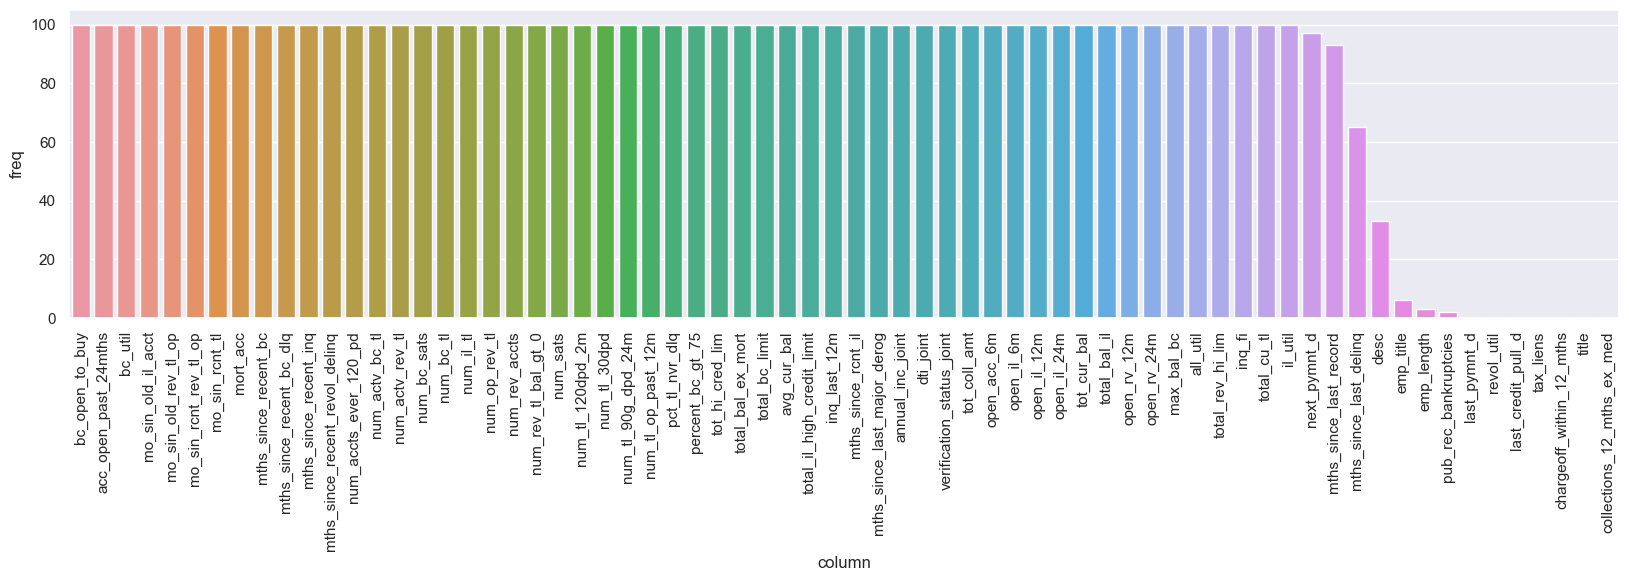

In [2700]:
nulls.sort_values(by='freq',ascending=False,inplace=True)
nulls
fig, ax = plt.subplots(figsize=(20, 4))
sns.barplot(data=nulls,x='column',y='freq', ax=ax)
plt.xticks(rotation=90)
plt.show()

Most of the columns has 100% null values and some seems to have nulls greater than 25% , these columns needs to be removed.

### Step 1: Removing Columns which are completely Null

#### Removing the Columns that are completely Null as they wont provide any information about customer's loan processing

In [2701]:
#Removing Columns that are completely null

raw0=raw_0.dropna(how='all',axis=1) 

In [2702]:
#Displaying Columns that are completly null

print ('\033[1m' + '\033[4m'+"Removed below columns that are completely Null which makes these columns insignifcant for Analysis:\n\n" +'\033[0m', end="") 
for col in raw:
    if col not in raw0:
        print(end = col +" , " )

Removed below columns that are completely Null which makes these columns insignifcant for Analysis:

mths_since_last_major_derog , annual_inc_joint , dti_joint , verification_status_joint , tot_coll_amt , tot_cur_bal , open_acc_6m , open_il_6m , open_il_12m , open_il_24m , mths_since_rcnt_il , total_bal_il , il_util , open_rv_12m , open_rv_24m , max_bal_bc , all_util , total_rev_hi_lim , inq_fi , total_cu_tl , inq_last_12m , acc_open_past_24mths , avg_cur_bal , bc_open_to_buy , bc_util , mo_sin_old_il_acct , mo_sin_old_rev_tl_op , mo_sin_rcnt_rev_tl_op , mo_sin_rcnt_tl , mort_acc , mths_since_recent_bc , mths_since_recent_bc_dlq , mths_since_recent_inq , mths_since_recent_revol_delinq , num_accts_ever_120_pd , num_actv_bc_tl , num_actv_rev_tl , num_bc_sats , num_bc_tl , num_il_tl , num_op_rev_tl , num_rev_accts , num_rev_tl_bal_gt_0 , num_sats , num_tl_120dpd_2m , num_tl_30dpd , num_tl_90g_dpd_24m , num_tl_op_past_12m , pct_tl_nvr_dlq , percent_bc_gt_75 , tot_hi_cred_lim , total_bal_ex




### Step 2: Removing Columns which has null values greater than 25%

In [2703]:
# Checking the fill rate of the columns to identify records with maximum nulls.
# In general we assume that records with nulls greater than 25% will not be significant for the analysis

temp2=pd.DataFrame([[ col for col in raw0 if raw0[col].isnull().sum() > 0 ],
                    [ round(raw0[col].isnull().sum()*100/len(raw0),2) for col in raw0 if raw0[col].isnull().sum() > 0 ]] ).transpose()
temp2.columns=['column','freq']
temp2

,column,freq
0,emp_title,6.19
1,emp_length,2.71
2,desc,32.58
3,title,0.03
4,mths_since_last_delinq,64.66
5,mths_since_last_record,92.99
6,revol_util,0.13
7,last_pymnt_d,0.18
8,next_pymnt_d,97.13
9,last_credit_pull_d,0.01


In [2704]:
## Removing Columns with null values greater than 25 %
raw1=raw0[[ col for col in raw0 if (raw0[col].count()/len(raw0)) >=0.25 ]] 

In [2705]:
print ('\033[1m' +'\033[4m'+"Removed below Columns from Loan.csv, Since they have null values greater than 25%:"+'\033[0m')
for col in raw0:
    if col not in raw1:
        print('* ' + col )

Removed below Columns from Loan.csv, Since they have null values greater than 25%:
* mths_since_last_record
* next_pymnt_d


##### Removing 'mths_since_last_delinq' which has 65% of null values, which might not produce any expected outcomes

In [2706]:
raw1= raw1.drop('mths_since_last_delinq',axis=1)

### Step 3: Removing Columns that would not have any influence over the Analysis of given problem statement

##### Removing the columns that defines 'Customer behaviour' after loan disbursement, which can't be used as a factor to determine the risk of providing loan to a customer

In [2707]:
#Dropping insignificant columns

raw2=raw1.drop([ 'delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec',
                 'out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp',
                 'total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee',
                 'last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type',
                 'revol_bal','revol_util','total_acc','out_prncp'], axis=1)


In [2708]:
print ('\033[1m'+'\033[4m'+"The below columns were removed as they are insignificant for the analysis of given problem statement:\n\n"+'\033[0m' , end="") 
for col in raw1:
    if col not in raw2:
        print(end = col +" , " )

The below columns were removed as they are insignificant for the analysis of given problem statement:

delinq_2yrs , earliest_cr_line , inq_last_6mths , open_acc , pub_rec , revol_bal , revol_util , total_acc , out_prncp , out_prncp_inv , total_pymnt , total_pymnt_inv , total_rec_prncp , total_rec_int , total_rec_late_fee , recoveries , collection_recovery_fee , last_pymnt_d , last_pymnt_amnt , last_credit_pull_d , application_type , 

In [2709]:
#Checking the number of Columns after cleansing the data

raw2.shape

(39717, 33)

In [2710]:
raw2.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,f,0.0,1,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,f,0.0,1,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,f,0.0,1,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,f,0.0,1,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,f,0.0,1,0,0.0,0,0.0,0.0


### Step 4 : Identifying columns whose values will not produce any outcome

In [2711]:
raw2.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,f,0.0,1,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,f,0.0,1,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,f,0.0,1,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,f,0.0,1,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,f,0.0,1,0,0.0,0,0.0,0.0


In [2712]:
temp=[col for col in raw2 if raw2[col].isnull().sum()>0]
temp

['emp_title',
 'emp_length',
 'desc',
 'title',
 'collections_12_mths_ex_med',
 'chargeoff_within_12_mths',
 'pub_rec_bankruptcies',
 'tax_liens']

In [2713]:
# Creating Temporary dataframe for the remaining null values
temp=raw2[temp]


In [2714]:
# Checking samples of the Remaining Null columns

temp.head()

,emp_title,emp_length,desc,title,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
0,NaN,10+ years,Borrower added on 12/22/11 > I need to upgra...,Computer,0.0,0.0,0.0,0.0
1,Ryder,< 1 year,Borrower added on 12/22/11 > I plan to use t...,bike,0.0,0.0,0.0,0.0
2,NaN,10+ years,NaN,real estate business,0.0,0.0,0.0,0.0
3,AIR RESOURCES BOARD,10+ years,Borrower added on 12/21/11 > to pay for prop...,personel,0.0,0.0,0.0,0.0
4,University Medical Group,1 year,Borrower added on 12/21/11 > I plan on combi...,Personal,0.0,0.0,0.0,0.0


In [2715]:
# Extracting the Value Counts of Ramaining null columns
for col in temp:
    val=temp[col].value_counts()
    print('\033[1m' + '\033[4m' +'Unique Value counts of '+ col +':' +'\n'+'\033[0m')
    print(val)
    print('\n')

Unique Value counts of emp_title:

US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: emp_title, Length: 28820, dtype: int64


Unique Value counts of emp_length:

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64


Unique Value counts of desc:

                                                                                                                                                                          

In [2716]:
# Removing the columns whose values are not showing any positive or negative outcome for the analysis
raw3=raw2.drop(['collections_12_mths_ex_med','chargeoff_within_12_mths' ,'tax_liens'],axis=1)

In [2717]:
raw3.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,initial_list_status,policy_code,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,f,1,0,0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,f,1,0,0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,f,1,0,0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,f,1,0,0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,f,1,0,0,0.0


#### The below columns will not have any potential impact over the problem statemnet analysis 

* 'url': URL for the LC page with the listing data
* 'desc': Loan description provided by the borrower
* 'zip_code':The first 3 numbers of the zip code provided by the borrower in the loan application.
* 'id': A unique LC assigned ID for the loan listing.
* 'member_id': A unique LC assigned Id for the borrower member.
* 'pymnt_plan': Indicates if a payment plan has been put in place for the loan
* 'installment': The monthly payment owed by the borrower if the loan originates.


In [2718]:
# Removing the Identified Columns
raw3=raw3.drop(['url','desc' ,'zip_code','id','member_id','pymnt_plan','installment'],axis=1)

#### Removing the columns whose values are not suffcient to decide any outcomes for the given probelm statement

In [2719]:
temp =[ col for col in raw3 if raw3[col].nunique()==1]
raw[temp].head()

,initial_list_status,policy_code,acc_now_delinq,delinq_amnt
0,f,1,0,0
1,f,1,0,0
2,f,1,0,0
3,f,1,0,0
4,f,1,0,0


### The below Columns has values which will not influence the analysis

* 'pymnt_plan': Indicates if a payment plan has been put in place for the loan All loans have payment plan as 'n')
* 'initial_list_status': The initial listing status of the loan. Possible values are – W, F ( as per the Data all Loans are 'F')
* 'policy_code': publicly available policy_code=1
                 new products not publicly available policy_code=2
                 (As per the Data all products were publicly available)
* 'acc_now_delinq': The number of accounts on which the borrower is now delinquent.(All borrower has 0 delinquent loan                              accounts)
* 'delinq_amnt': The past-due amount owed for the accounts on which the borrower is now delinquent.(No amounts were owed by the borrower since all borrowers has 0 delinquent account) 

In [2720]:
raw3=raw3.drop(temp,axis=1)

In [2721]:
raw3.shape

(39717, 19)

In [2722]:
# Checking Null/Missing Values after Fixing Rows and Columns


temp=pd.DataFrame([[ col for col in raw3 if raw3[col].isnull().sum() > 0 ],
                    [ round(raw3[col].isnull().sum()*100/len(raw3),2) for col in raw3 if raw3[col].isnull().sum() > 0 ]] ).transpose()
temp.columns=['column','freq']
temp

,column,freq
0,emp_title,6.19
1,emp_length,2.71
2,title,0.03
3,pub_rec_bankruptcies,1.75


#### Observations after fixing Rows/Columns:

* The final raw3 dataset for Loan.csv still has some null/missing values even after cleaning the Rows & Columns.
* This missing or null values will be replaced by using some data Imputation techniques
* Before Proceeding further with the imputation the Data types needs to be validated and changes had to be made wherever it is neccasary. 

### Data Type Check

In [2723]:
# Checking the fill rate of the columns to identify the columns that require data imputation
raw3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   grade                 39717 non-null  object 
 6   sub_grade             39717 non-null  object 
 7   emp_title             37258 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        39717 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  issue_d               39717 non-null  object 
 13  loan_status           39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  title              

In [2724]:
#Standardising all the Amounts Columns to Float Data type

raw3['loan_amnt']=raw3['loan_amnt'].astype(float)
raw3['funded_amnt']=raw3['funded_amnt'].astype(float)

raw3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  float64
 1   funded_amnt           39717 non-null  float64
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   grade                 39717 non-null  object 
 6   sub_grade             39717 non-null  object 
 7   emp_title             37258 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        39717 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  issue_d               39717 non-null  object 
 13  loan_status           39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  title              

#### The Data type of the below columns seems to be odd, these columns needs to be reviewed and assigned further with appropiate datatypes.

* term
* int_rate
* emp_length
* pub_rec_bankruptcies

In [2725]:
# Checking Sample values of these columns
raw3[['term','int_rate','emp_length']].head()

,term,int_rate,emp_length
0,36 months,10.65%,10+ years
1,60 months,15.27%,< 1 year
2,36 months,15.96%,10+ years
3,36 months,13.49%,10+ years
4,60 months,12.69%,1 year


#### Data type correction of 'emp_length' column:

In [2726]:
raw3['emp_length'].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [2727]:
raw3.loc[(raw3['emp_length']=='< 1 year'),'emp_length']=0

In [2728]:
raw3['emp_length']=raw3['emp_length'].str.replace('\D','')

In [2729]:
raw3['emp_length']=raw3['emp_length'].fillna(0)

In [2730]:
raw3['emp_length'].value_counts()

10    8879
0     5658
2     4388
3     4095
4     3436
5     3282
1     3240
6     2229
7     1773
8     1479
9     1258
Name: emp_length, dtype: int64

In [2731]:
raw3['emp_length']=raw3['emp_length'].astype(int)

#### Data type correction of 'term' column:

In [2732]:
raw3['term'].value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [2733]:
raw3['term']=raw3['term'].str.replace('\D','')

In [2734]:
raw3['term'].value_counts()

36    29096
60    10621
Name: term, dtype: int64

In [2735]:
raw3['term']=raw3['term'].astype(int)

#### Data type correction of 'int_rate' column:

In [2736]:
raw3['int_rate']=raw3['int_rate'].str.replace('%','')

In [2737]:
raw3['int_rate'].value_counts()

10.99    956
13.49    826
11.49    825
7.51     787
7.88     725
        ... 
18.36      1
16.96      1
16.15      1
16.01      1
17.44      1
Name: int_rate, Length: 371, dtype: int64

In [2738]:
raw3['int_rate']=raw3['int_rate'].astype(float)

### Data Imputation 

In [2739]:
# Checking Null/Missing Values after Fixing Rows and Columns


temp=pd.DataFrame([[ col for col in raw3 if raw3[col].isnull().sum() > 0 ],
                    [ round(raw3[col].isnull().sum()*100/len(raw3),2) for col in raw3 if raw3[col].isnull().sum() > 0 ]] ).transpose()
temp.columns=['column','freq']
temp

,column,freq
0,emp_title,6.19
1,title,0.03
2,pub_rec_bankruptcies,1.75


#### Cleaning Missing/Null values in 'emp_title':

In [2740]:
raw3['emp_title'].unique()

array([nan, 'Ryder', 'AIR RESOURCES BOARD', ..., 'FiSite Research',
       'Squarewave Solutions, Ltd.', 'Evergreen Center'], dtype=object)

##### Assigning a new label called 'Unknown' to the missing Employment titles

In [2741]:
raw3['emp_title']=raw3['emp_title'].fillna('Unknown')

In [2742]:
raw3['emp_title'].value_counts()

Unknown                            2459
US Army                             134
Bank of America                     109
IBM                                  66
AT&T                                 59
                                   ... 
AMEC                                  1
lee county sheriff                    1
Bacon County Board of Education       1
Hotpads                               1
Evergreen Center                      1
Name: emp_title, Length: 28821, dtype: int64

#### Cleaning Missing/Null values in 'title':

In [2743]:
raw3['title'].unique()

array(['Computer', 'bike', 'real estate business', ...,
       'Retiring credit card debt', 'MBA Loan Consolidation', 'JAL Loan'],
      dtype=object)

In [2744]:
raw3['title'].value_counts()

Debt Consolidation                  2184
Debt Consolidation Loan             1729
Personal Loan                        659
Consolidation                        517
debt consolidation                   505
                                    ... 
your rate is better than my rate       1
Concession Trailer                     1
gregs                                  1
EZover                                 1
JAL Loan                               1
Name: title, Length: 19615, dtype: int64

##### Assigning a new label called 'Unknown_title' to the missing Employment titles

In [2745]:
raw3['title']=raw3['title'].fillna('Unknown_title')

#### Cleaning Missing/Null values in 'pub_rec_bankruptcies':

In [2746]:
raw3['pub_rec_bankruptcies'].value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [2747]:
raw3['pub_rec_bankruptcies'].describe()

count    39020.000000
mean         0.043260
std          0.204324
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

In [2748]:
#Assigning Median values to the missing columns
prb=raw3['pub_rec_bankruptcies'].median()
raw3['pub_rec_bankruptcies']=raw3['pub_rec_bankruptcies'].fillna(prb)

raw3['pub_rec_bankruptcies']=raw3['pub_rec_bankruptcies'].astype(int)
raw3['pub_rec_bankruptcies'].unique()

array([0, 1, 2])

In [2749]:
raw3['pub_rec_bankruptcies'].value_counts()

0    38036
1     1674
2        7
Name: pub_rec_bankruptcies, dtype: int64

### Null Record Check After Data Cleanising

In [2750]:
raw3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  float64
 1   funded_amnt           39717 non-null  float64
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  int64  
 4   int_rate              39717 non-null  float64
 5   grade                 39717 non-null  object 
 6   sub_grade             39717 non-null  object 
 7   emp_title             39717 non-null  object 
 8   emp_length            39717 non-null  int64  
 9   home_ownership        39717 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  issue_d               39717 non-null  object 
 13  loan_status           39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  title              

### Toal numerical and categorical columns after Data Cleanising

In [2751]:
print('Total number of numeric Columns: {}'.format( len([col for col in raw3 if raw3[col].dtype!='object'])))
print('Total number of categorical Columns: {}'.format( len([col for col in raw3 if raw3[col].dtype=='object'])))


Total number of numeric Columns: 9
Total number of categorical Columns: 10


In [2752]:
raw3.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,pub_rec_bankruptcies
0,5000.0,5000.0,4975.0,36,10.65,B,B2,Unknown,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,AZ,27.65,0
1,2500.0,2500.0,2500.0,60,15.27,C,C4,Ryder,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00,0
2,2400.0,2400.0,2400.0,36,15.96,C,C5,Unknown,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,IL,8.72,0
3,10000.0,10000.0,10000.0,36,13.49,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.00,0
4,3000.0,3000.0,3000.0,60,12.69,B,B5,University Medical Group,1,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,OR,17.94,0


In [2753]:
raw3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  float64
 1   funded_amnt           39717 non-null  float64
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  int64  
 4   int_rate              39717 non-null  float64
 5   grade                 39717 non-null  object 
 6   sub_grade             39717 non-null  object 
 7   emp_title             39717 non-null  object 
 8   emp_length            39717 non-null  int64  
 9   home_ownership        39717 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  issue_d               39717 non-null  object 
 13  loan_status           39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  title              

#### Data Observation:
Afte looking in to the loan status (Fully paid, charged Off, current ), the loan data which are currently active can be excluded since they don't have an outcome for the analysis. Final dataset will be filtered with Fully paid (customers who have paid their loan completely) and charged off (customers who defaulted their loan and charged off for the same)

In [2754]:
raw4=raw3[~(raw3['loan_status']=='Current')]

In [2755]:
raw4.shape

(38577, 19)

## Outlier Analysis

Checking for outliers from the applicable columns to remove any outlier that will deviate the analysis and may affect the final model

In [2756]:
raw4.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'addr_state', 'dti', 'pub_rec_bankruptcies'],
      dtype='object')

In [2757]:
raw4['loan_amnt'].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [2758]:
raw4.quantile(q=[0.0,0.15,0.25, 0.5, 0.75,0.90,0.95,1], axis=0, numeric_only=True)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,emp_length,annual_inc,dti,pub_rec_bankruptcies
0.00,500.0,500.0,0.00000,36.0,5.420,0.0,4000.0,0.00,0.0
0.15,4000.0,4000.0,3600.00000,36.0,7.510,1.0,34000.0,5.55,0.0
0.25,5300.0,5200.0,5000.00000,36.0,8.940,2.0,40000.0,8.13,0.0
0.50,9600.0,9550.0,8733.44000,36.0,11.710,4.0,58868.0,13.37,0.0
0.75,15000.0,15000.0,14000.00000,36.0,14.380,9.0,82000.0,18.56,0.0
0.90,21600.0,20000.0,19975.00000,60.0,16.820,10.0,115000.0,22.29,0.0
0.95,25000.0,25000.0,24500.06659,60.0,18.312,10.0,140004.0,23.80,0.0
1.00,35000.0,35000.0,35000.00000,60.0,24.400,10.0,6000000.0,29.99,2.0


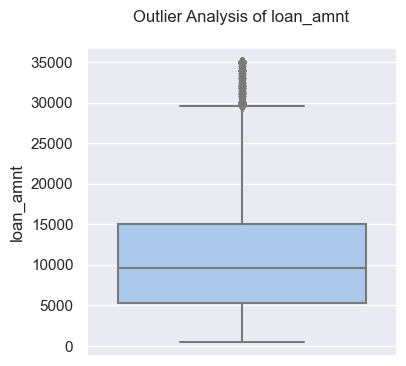

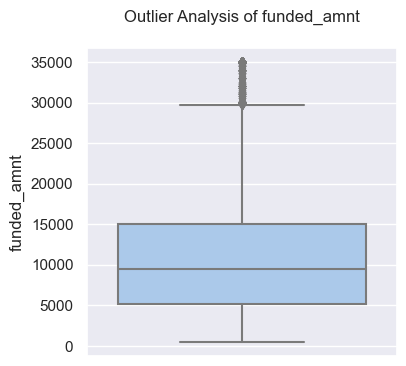

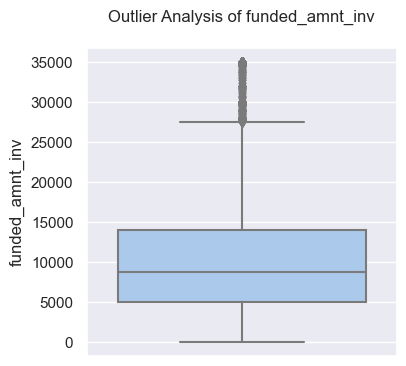

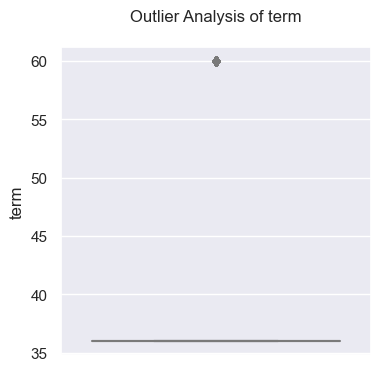

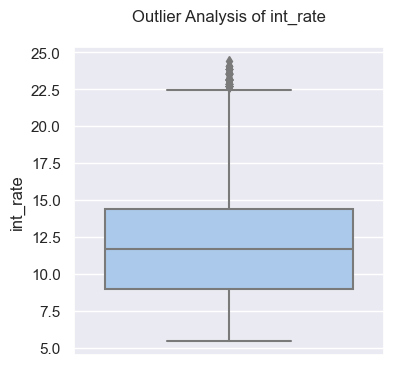

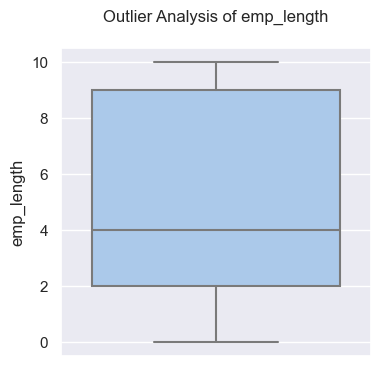

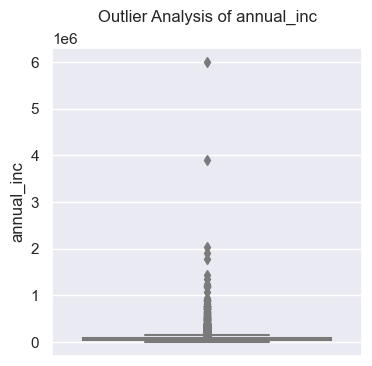

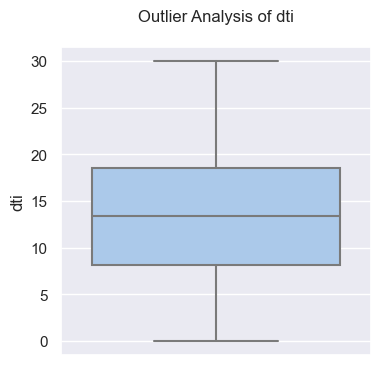

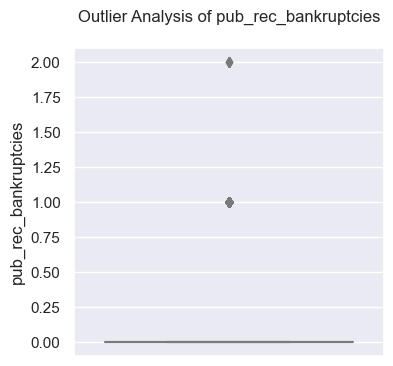

In [2759]:
for col in raw4:
    if raw4[col].dtype!='object':
        plt.figure(figsize=(4,4))
        sns.boxplot(y=raw4[col])
        plt.title('Outlier Analysis of ' + col +'\n')
        plt.show()

## Observations on Outliers

* Loan Amount, Funded Amount & funded Amount by investor potentially has some outliers that lies after Q3 +1.5 *IQR but this can be acceptable as per the data distribution.
* Loan Term/ Tenure of Loan repaymnet has only two possible values (i.e) 36 and 60 months since arround 75% of customers took 36 months loan term 60 is lying outside th wiskers, so this column don't need outlier treatment
* Interest Rate has some values that were outisde the wiskers but this will not need any outlier treatment.
* Annual Income seems to have outliers that is way out of the IQR range and wiskers where the data is skewed to the right because of outliers - This column needs outlier treatment
* dti or Debt Income ratio is not having any potential outliers
* We can ignore pub_rec_bankrupties since the variable has only 4 possible unique value counts.


## Outlier Treatment for 'Annual Income'

In [2760]:
raw4.annual_inc.quantile([0,0.25,0.50,0.75,0.95,1])

0.00       4000.0
0.25      40000.0
0.50      58868.0
0.75      82000.0
0.95     140004.0
1.00    6000000.0
Name: annual_inc, dtype: float64

#### Percentile Method to Remove outliers from Annual Income:

In [2761]:
#cdeclaring upper and lower cap boundries for the data.
upper_cap=raw4.annual_inc.quantile(0.99)
lower_cap=raw4.annual_inc.quantile(0.01)

#iqr=q3-q1
#upper_cap=q3 +(1.5*iqr)
#lower_cap=q1 -(1.5*iqr)
#iqr,q3,q1

In [2762]:
#Removing Outliers
raw5=raw4 ## Source backup with outlier


raw4.loc[(raw4['annual_inc']>upper_cap),'annual_inc'] = upper_cap
raw4.loc[(raw4['annual_inc']<lower_cap),'annual_inc'] =lower_cap


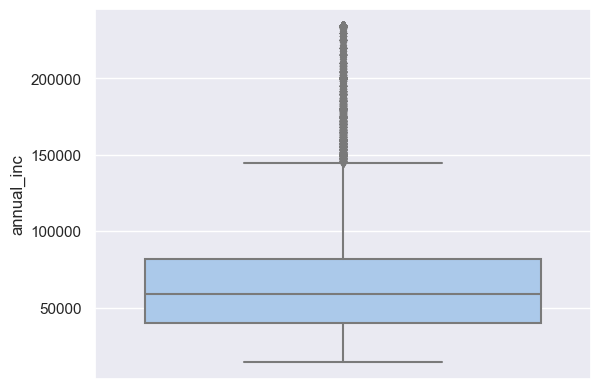

In [2763]:
sns.boxplot(data=raw4,y='annual_inc')
plt.show()

In [2764]:
raw4.shape

(38577, 19)

# Adding Derived Metrics for Data Analysis

##### loan_amnt_reduced

* Creating a field called loan amount reduced to track whether the LC reduced the requested loan amount from customer post recieving their application

In [2765]:
raw4['loan_amnt_reduced']= np.where(raw4['loan_amnt']==raw4['funded_amnt'], 0, 1)

In [2766]:
raw4['loan_amnt_reduced'].value_counts()

0    36820
1     1757
Name: loan_amnt_reduced, dtype: int64

##### bankruptcies_rec

* Creating a field called Bankruptcies recorded to track whether bankruptcies public records is available or not.

In [2767]:
raw4['bankruptcies_rec']= np.where(raw4['pub_rec_bankruptcies'] > 0, 1, 0)

In [2768]:
raw4['bankruptcies_rec'].value_counts()

0    36935
1     1642
Name: bankruptcies_rec, dtype: int64

##### loan_chargedoff

* Creating a field called largedoff to check whether a borrower charged off a loan or not

In [2769]:
raw4['loan_chargedoff']= np.where(raw4['loan_status'] =='Charged Off',1,0)

In [2770]:
raw4['loan_chargedoff'].value_counts()
raw4['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [2771]:
raw4['loan_chargedoff'].value_counts()

0    32950
1     5627
Name: loan_chargedoff, dtype: int64

##### own_house

* Creating a field called own_house to check whether a borrower has own house or not

In [2772]:
raw4['own_house']= np.where(raw4['home_ownership'] =='OWN',1,0)

In [2773]:
raw4['home_ownership'].value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [2774]:
raw4['own_house'].value_counts()

0    35602
1     2975
Name: own_house, dtype: int64



##### income_verified

* Creating a field called income_verified to check whether a borrower has his income verified or not

In [2775]:
raw4['income_verified']=np.where(raw4['verification_status'] =='Verified',1,0)

In [2776]:
raw4['income_verified'].value_counts()

0    26371
1    12206
Name: income_verified, dtype: int64

In [2777]:
raw4['verification_status'].value_counts()

Not Verified       16694
Verified           12206
Source Verified     9677
Name: verification_status, dtype: int64

# Univariate Analysis for Numeric Variable

## Univariate for Loan Amount

In [2778]:
def hist(data,style,color,edge,Xlabel,Title,bins):
    #sns.set_style('ticks')
    fig, ax = plt.subplots(figsize=(18, 5))
    sns.set_theme(style=str(style),palette=str(color)) # pastels deep, muted, pastel, bright, dark, and colorblind.
    sns.histplot(data,bins=bins,edgecolor=str(edge),kde=True, ax=ax)
    plt.title(Title)
    plt.xlabel(Xlabel)
    plt.show()
    
   

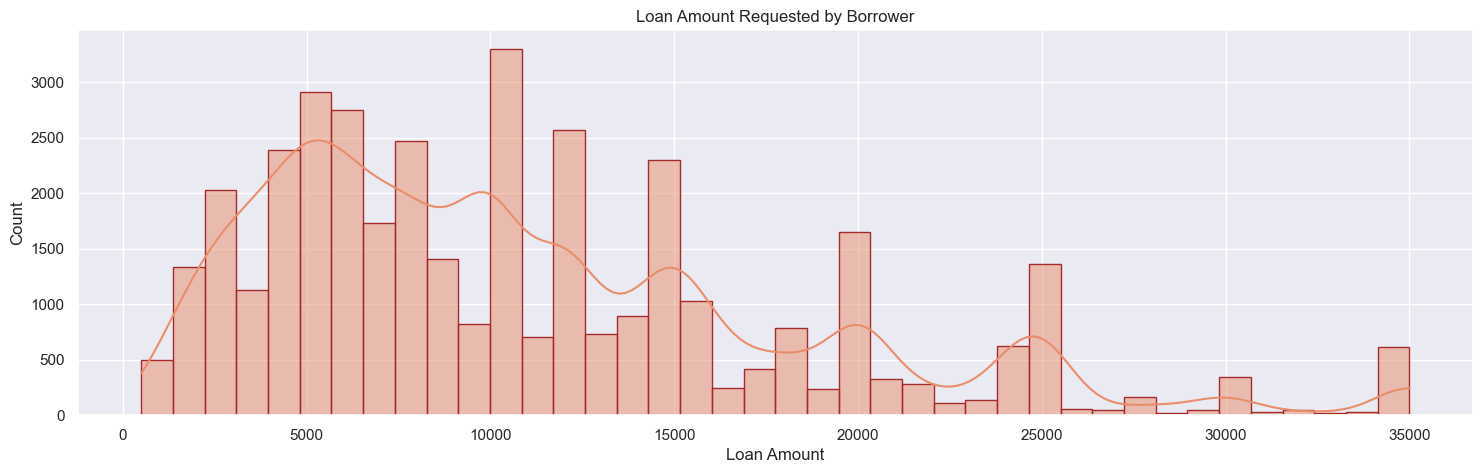

In [2779]:
hist(raw4['loan_amnt'],'darkgrid','flare','brown','Loan Amount',"Loan Amount Requested by Borrower",40) 

## Observations for Loan Amount:

* The values lies in between 500 -35000
* Maximum Density Lies arround 25% (in between 5000 -10000)

## Univariate for Funded Amount

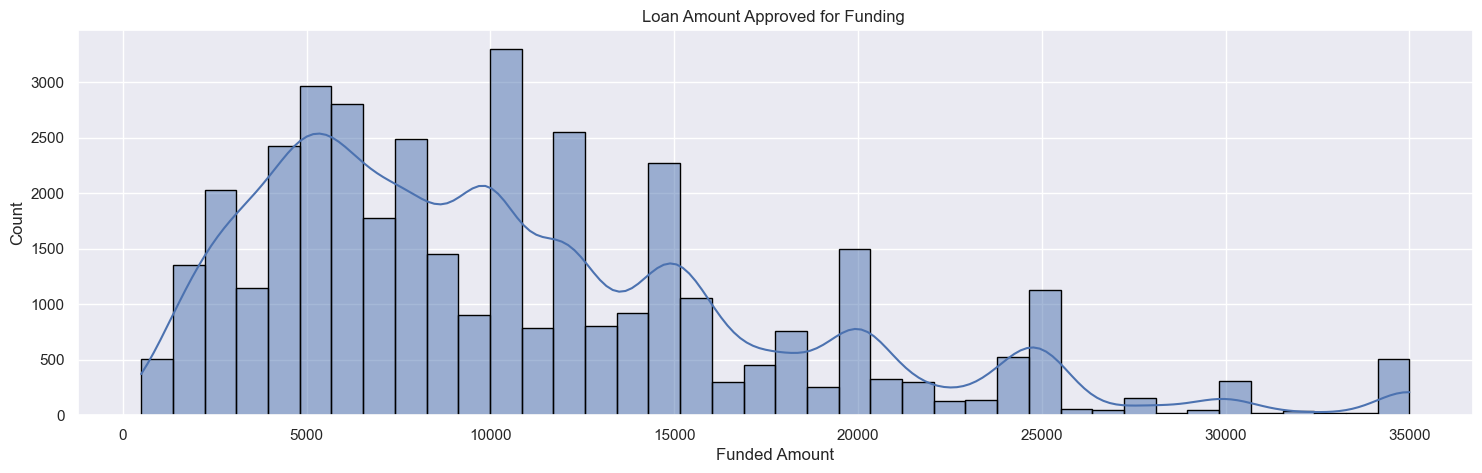

In [2780]:
hist(raw4['funded_amnt'],'darkgrid','deep','black','Funded Amount',"Loan Amount Approved for Funding ",40) 

### Data Distribution analysis for the below Loan Amounts:

* loan_amnt:The Loan amount is the initally requested amount by the customer as per his requirmenet
* funded_amnt:The funded amount is the amount proposed by the lending club after analysing the potential risks for that customers and his portfolio.

##### All these three varaiables are aligned lineraly, where the data distribution is similar across all three columns.

## Univariate For Annual Income

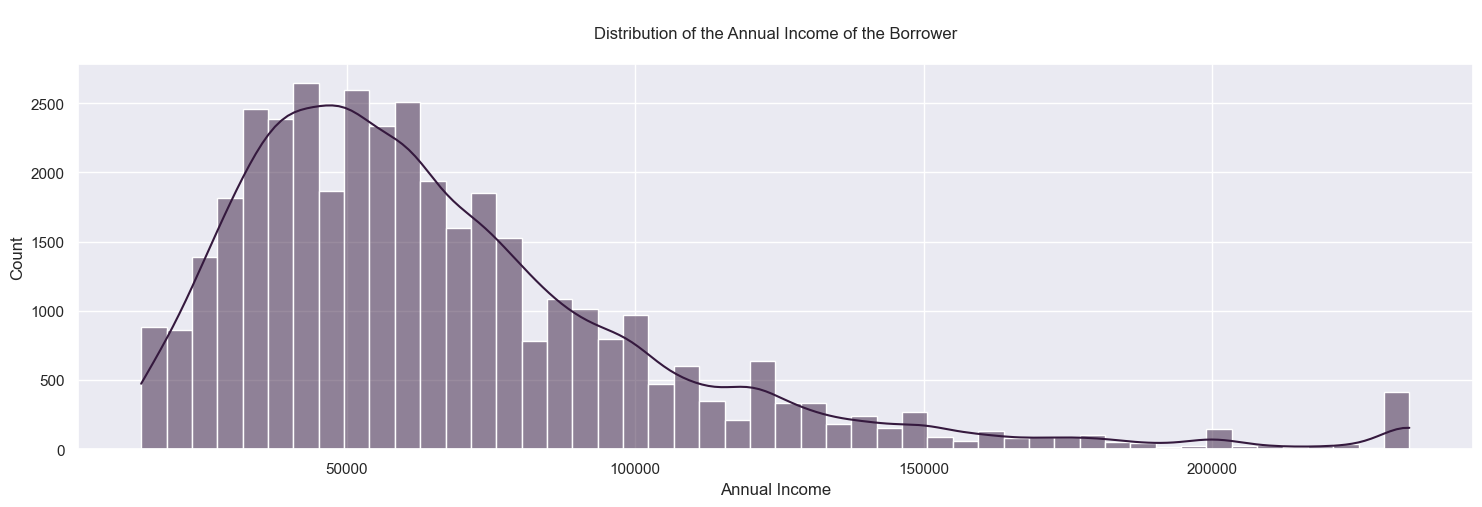

In [2781]:
hist(raw4['annual_inc'],'darkgrid','rocket','white','Annual Income',"\nDistribution of the Annual Income of the Borrower\n ",50) 

## Univariate Anlysis of Interest Rate

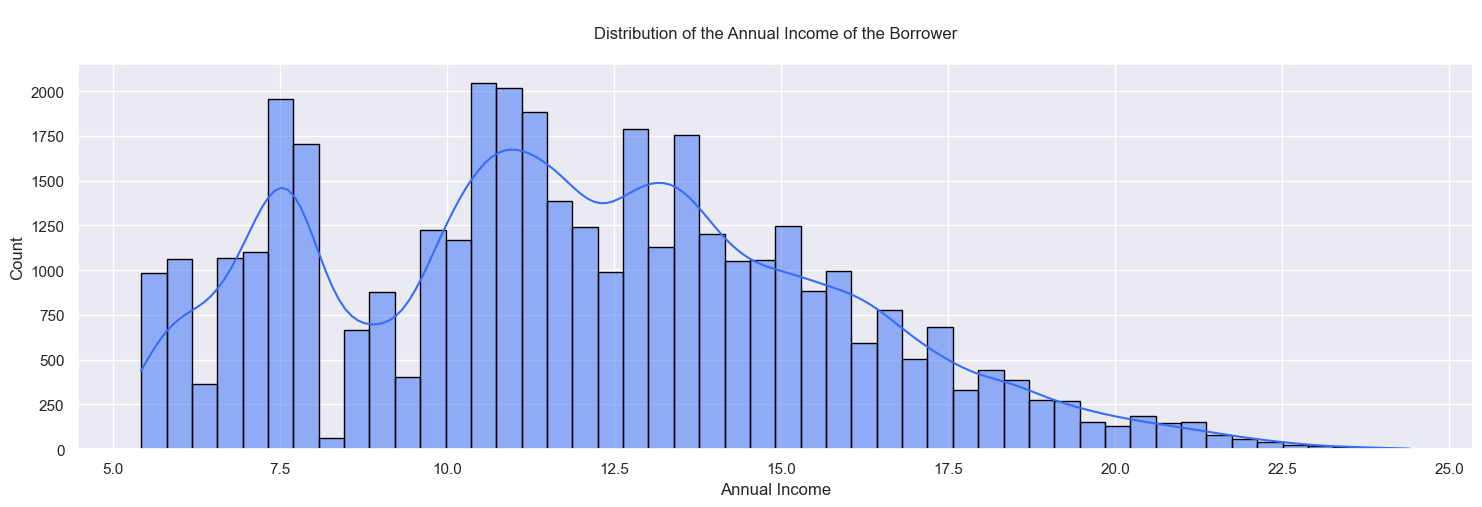

In [2782]:
hist(raw4['int_rate'],'whitegrid','rainbow','black','Annual Income',"\nDistribution of the Annual Income of the Borrower\n ",50) 

## Observation

 Majority of loans are lying in the range of these interest rates
* 7-8%
* 11-12%

## Univariate Analysis of Loan Repayment Tenure ('term')

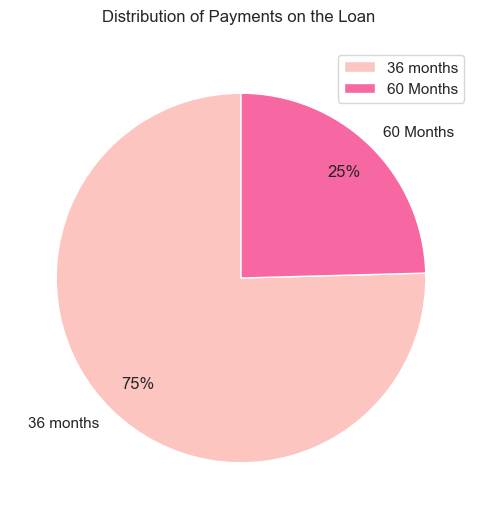

In [2783]:
#sns.countplot(x ='term', data = raw4)
colors = sns.color_palette("RdPu", 3)
plt.figure(figsize=(6,6))
plt.pie(raw4['term'].value_counts(),labels=['36 months','60 Months'],startangle=90, 
        autopct='%1.f%%',colors=colors, pctdistance=0.8)

plt.title('Distribution of Payments on the Loan \n')
plt.legend(loc='upper right')
# Show the plot
plt.show()

## Observation
* 75% of the loans are for term 36 month

## Univariate Analysis for dti (Debit to Income Ratio):

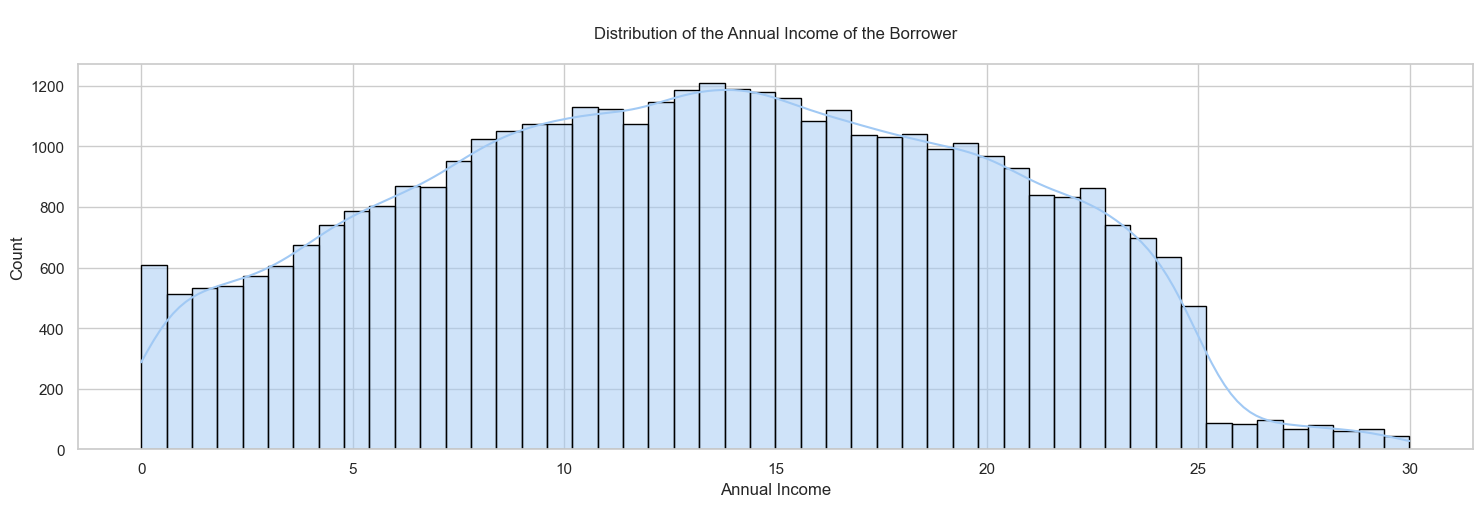

In [2784]:
hist(raw4['dti'],'darkgrid','pastel','black','Annual Income',"\nDistribution of the Annual Income of the Borrower\n ",50) 

## Univariate Analysis for Public record of Bankruptcies

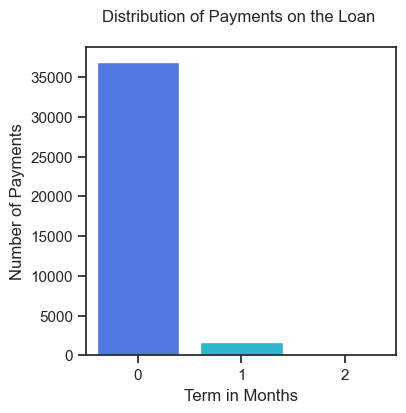

In [2785]:
raw4['pub_rec_bankruptcies'].value_counts()
sns.set_style('ticks')
fig, ax = plt.subplots(figsize=(4, 4))
sns.set_theme(style="white",palette="rainbow")


sns.countplot(x ='pub_rec_bankruptcies', data = raw4, ax=ax)
plt.xlabel('Term in Months')
plt.ylabel('Number of Payments')
plt.title('Distribution of Payments on the Loan \n')

# Show the plot
plt.show()


## Univariate for Emp_length

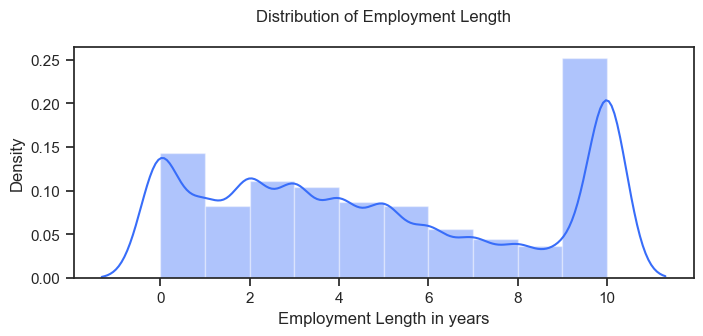

In [2786]:
sns.set_style('ticks')
fig, ax = plt.subplots(figsize=(8, 3))
sns.set_theme(style="white",palette="pastel")
sns.distplot(raw4['emp_length'],bins=10)
plt.xlabel('Employment Length in years')
plt.title('Distribution of Employment Length\n')
plt.show()

## Observation 

* Distribution of data is maximum for people who has 10 years of employment length
* We have explicitly converted all null data's to 0.


In [2787]:
Numerical=[col for col in raw4 if raw4[col].dtype!='object']
Categorical=[col for col in raw4 if raw4[col].dtype=='object']

## Univariate Analysis for loan_amnt_reduced

Loan amounts which are reduced from the initally requested amount by borrower

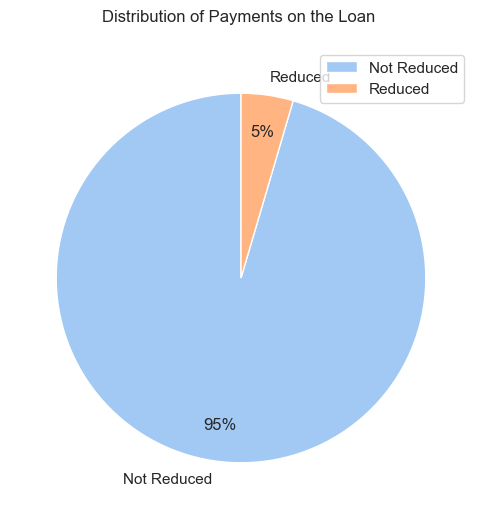

In [2788]:
#sns.countplot(x ='term', data = raw4)
colors = sns.color_palette("pastel", 6)
plt.figure(figsize=(6,6))
plt.pie(raw4['loan_amnt_reduced'].value_counts(),labels=['Not Reduced','Reduced'],startangle=90, 
        autopct='%1.f%%',colors=colors, pctdistance=0.8)

plt.title('Distribution of Payments on the Loan \n')
plt.legend(loc='upper right')
# Show the plot
plt.show()

In [2789]:
raw4['loan_amnt_reduced'].value_counts()

0    36820
1     1757
Name: loan_amnt_reduced, dtype: int64

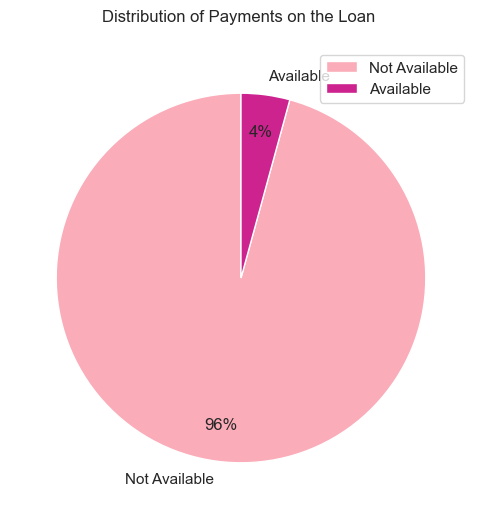

In [2790]:
#sns.countplot(x ='term', data = raw4)
colors = sns.color_palette("RdPu", 2)
plt.figure(figsize=(6,6))
plt.pie(raw4['bankruptcies_rec'].value_counts(),labels=['Not Available','Available'],startangle=90, 
        autopct='%1.f%%',colors=colors, pctdistance=0.8)

plt.title('Distribution of Payments on the Loan \n')
plt.legend(loc='upper right')
# Show the plot
plt.show()

## Univariate Analysis for Charged off Loans

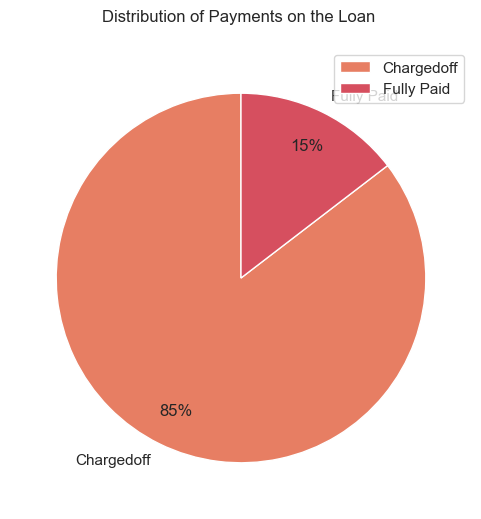

In [2791]:
#sns.countplot(x ='term', data = raw4)
colors = sns.color_palette("flare", 4)
plt.figure(figsize=(6,6))
plt.pie(raw4['loan_chargedoff'].value_counts(),labels=['Chargedoff','Fully Paid'],startangle=90, 
        autopct='%1.f%%',colors=colors, pctdistance=0.8)

plt.title('Distribution of Payments on the Loan \n')
plt.legend(loc='upper right')
# Show the plot
plt.show()

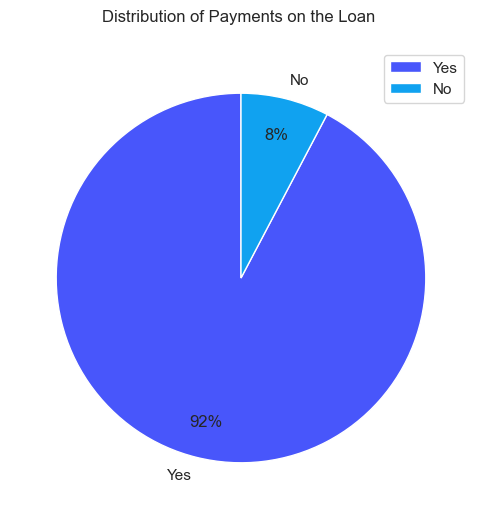

In [2792]:
#sns.countplot(x ='term', data = raw4)
colors = sns.color_palette("rainbow", 8)
plt.figure(figsize=(6,6))
plt.pie(raw4['own_house'].value_counts(),labels=['Yes','No'],startangle=90, 
        autopct='%1.f%%',colors=colors, pctdistance=0.8)

plt.title('Distribution of Payments on the Loan \n')
plt.legend(loc='upper right')
# Show the plot
plt.show()

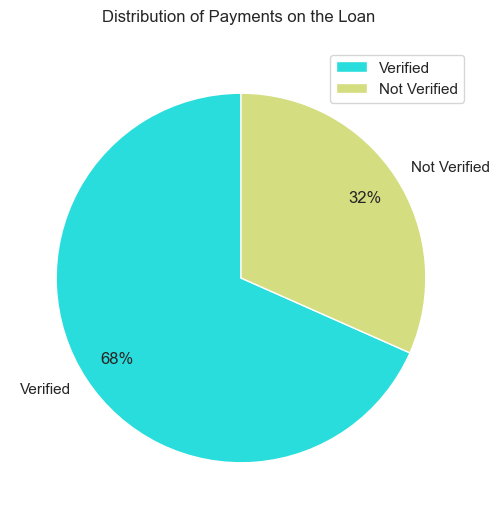

In [2793]:
#sns.countplot(x ='term', data = raw4)
colors = sns.color_palette("rainbow", 2)
plt.figure(figsize=(6,6))
plt.pie(raw4['income_verified'].value_counts(),labels=['Verified','Not Verified'],startangle=90, 
        autopct='%1.f%%',colors=colors, pctdistance=0.8)

plt.title('Distribution of Payments on the Loan \n')
plt.legend(loc='upper right')
# Show the plot
plt.show()

# Univariate Analysis for Categorical values

In [2794]:
Categorical

['grade',
 'sub_grade',
 'emp_title',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'title',
 'addr_state']

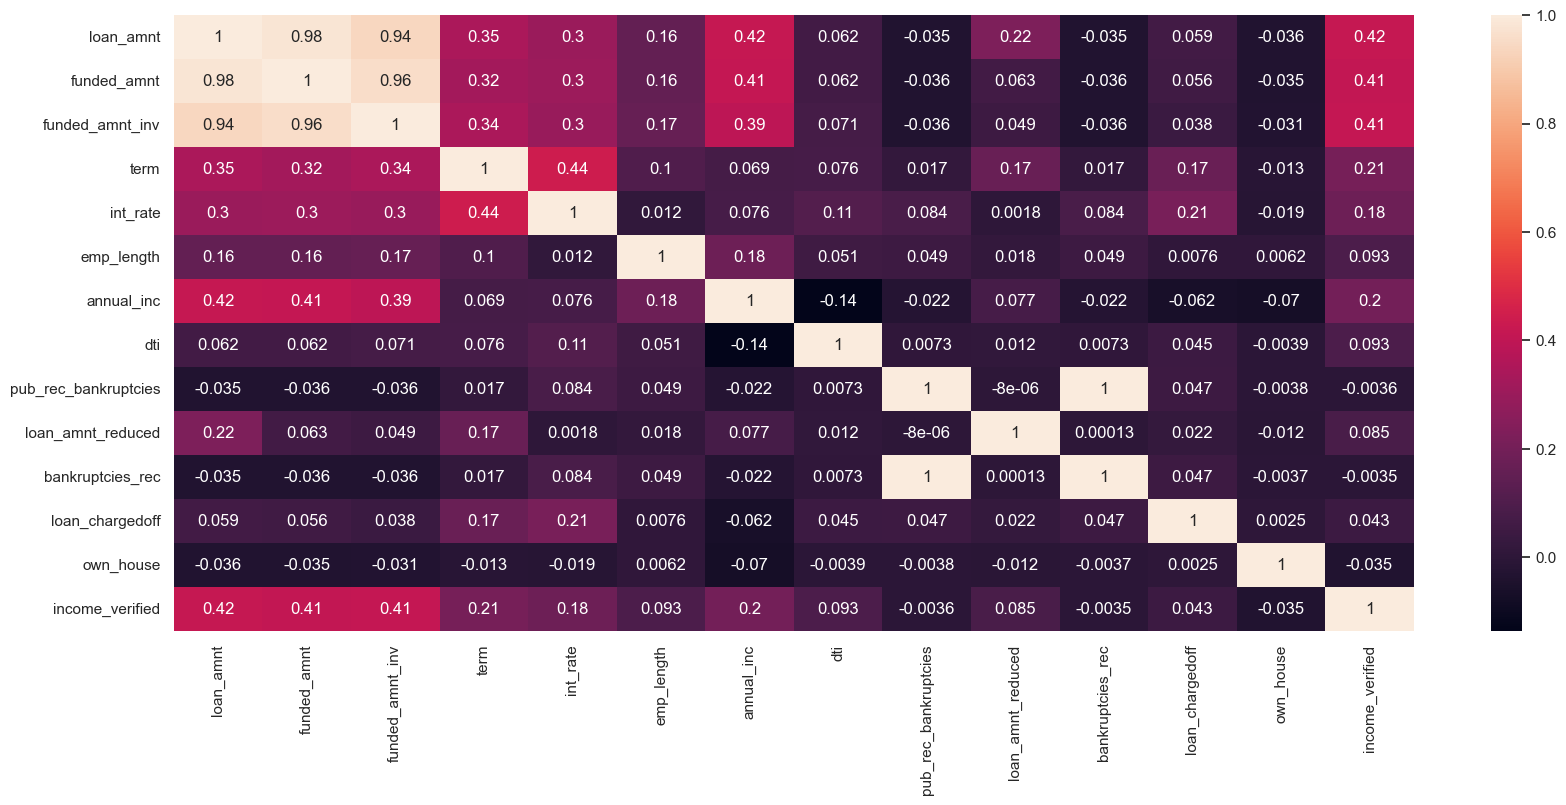

In [2795]:
plt.figure(figsize=(20, 8))
sns.heatmap(raw4.corr(),annot=True)
plt.show()